<a href="https://colab.research.google.com/github/Julia-jh/ML_wine/blob/saehee/wine_data_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Wine_ML_Climate/wine_total_data_0721.csv', index_col = 0)
df

,Longitude,Latitude,Soil Mapping Unit,Continent,Country,Region Lv1,Grape_Variety,SHARE_x,WRB4_x,KOPPEN,...,TG,TN,TX,RR,RR1,Year,lat_round,lon_round,lat_int,lon_int
0,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,290.671964,278.31567,303.50006,14.568954,1.333333,2021,-41.0,-64.0,-40,-63
1,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,290.655011,278.43283,303.47107,15.902047,1.428571,2021,-41.0,-63.0,-40,-63
2,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,291.058975,278.14188,304.67847,13.090754,1.285714,2021,-40.0,-64.0,-40,-63
3,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,290.893624,278.20532,304.39062,17.103797,1.500000,2021,-40.0,-63.0,-40,-63
4,-63.358333,-40.775000,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,290.671964,278.31567,303.50006,14.568954,1.333333,2021,-41.0,-64.0,-40,-63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13817,16.483333,47.833333,9993,Europe,Hungary,Balaton,white blend,60,CHha,D,...,288.641716,271.34473,301.28100,27.442335,4.714286,2021,48.0,17.0,47,16
13818,19.150000,46.391667,9768,Europe,Hungary,Duna,kadarka blau,50,PHcc,D,...,289.334150,270.87646,301.29350,24.005887,4.214286,2021,46.0,19.0,46,19
13819,19.150000,46.391667,9768,Europe,Hungary,Duna,kadarka blau,50,PHcc,D,...,289.495897,271.16970,301.07513,22.787967,4.261905,2021,46.0,20.0,46,19
13820,19.150000,46.391667,9768,Europe,Hungary,Duna,kadarka blau,50,PHcc,D,...,289.209322,270.88278,301.52680,22.684277,4.404762,2021,47.0,19.0,46,19


### 포도 품종 정리하기

In [13]:
df['Grape_Variety'] = df['Grape_Variety'].str.strip()

In [15]:
len(df['Grape_Variety'].unique())

187

In [16]:
grapes = [grape for grape in df.loc[~df['Grape_Variety'].isna(), 'Grape_Variety'].unique()]
grapes = sorted(grapes)
grapes

['aglianico',
 'albarin negro',
 'albarin negro mencia',
 'albarossa',
 'albillo criolo',
 'aleatico',
 'alfrocheiro preto',
 'alicante bouschet',
 'aligote',
 'aragonez',
 'areni noir',
 'assyrtiko',
 'baga',
 'barbera',
 'bastardo',
 'bical',
 'blatina',
 'blaufrankisch',
 'bobal',
 'bonarda',
 'bordeaux blend red',
 'bourboulenc',
 'brachetto',
 'brandy',
 'cabernet',
 'cabernet franc',
 'cabernet sauvignon',
 'cabernet savignon',
 'callet',
 'cardin',
 'carignan',
 'carignan gris',
 'carinena',
 'carmenere',
 'carrasquin',
 'chambourcin',
 'champagne blend',
 'chardonnay',
 'chasselas',
 'chenin blanc',
 'cinsault',
 'clairette',
 'concord',
 'corvina',
 'counoise',
 'criolla grande',
 'croatina',
 'debina',
 'dolcetto',
 'feteasca neagra',
 'fogoneu',
 'frankovka',
 'freisa',
 'furmint',
 'galego dourado',
 'gamaret',
 'gamay',
 'garnacha',
 'garnacha blanca',
 'garnacha tintorera',
 'gewurztraminer',
 'giro',
 'godello',
 'graciano',
 'grasevina',
 'greco nero',
 'grenache',
 'gr

In [17]:
# 동일 품종 or 오타 수정
df.loc[df['Grape_Variety'].isin(['albarin negro mencia']), 'Grape_Variety'] = 'albarin negro'
df.loc[df['Grape_Variety'].isin(['aragonez', 'tinta roriz', ]), 'Grape_Variety'] = 'tempranillo'
df.loc[df['Grape_Variety'].isin(['cabernet', 'cabernet savignon']), 'Grape_Variety'] = 'cabernet sauvignon'
df.loc[df['Grape_Variety'].isin(['carinena']), 'Grape_Variety'] = 'carignan'
df.loc[df['Grape_Variety'].isin(['garnacha', 'grenache tinta', ]), 'Grape_Variety'] = 'grenache'
df.loc[df['Grape_Variety'].isin(['garnacha tintorera', 'grenache tintorera']), 'Grape_Variety'] = 'alicante bouschet'
df.loc[df['Grape_Variety'].isin(['pinot noir precoce']), 'Grape_Variety'] = 'pinot noir'
df.loc[df['Grape_Variety'].isin(['shiraz and syrah']), 'Grape_Variety'] = 'syrah'
df.loc[df['Grape_Variety'].isin(['tanat']), 'Grape_Variety'] = 'tannat'

df['Grape_Variety'].unique()


array(['malbec', 'cabernet sauvignon', 'pinot noir', 'bastardo', 'merlot',
       'syrah', 'carmenere', 'zinfandel', 'alicante bouschet', 'palomino',
       'cabernet franc', 'petit verdot', 'petit sirah', 'gewurztraminer',
       'riesling', 'chardonnay', 'grenache', 'mauzac', 'mourvedre',
       'grenache blanc', 'clairette', 'roussanne', 'bourboulenc',
       'marsanne', 'saperavi', 'nebbiolo', 'nosiola', 'corvina',
       'rondinella', 'vranac', 'kratosija', 'galego dourado',
       'sauvignon blanc', 'pinot gris', 'cinsault', nan, 'carignan',
       'tempranillo', 'tannat', 'barbera', 'marselan', 'pinotage',
       'viognier', 'sangiovese', 'tinta barroca', 'touriga nacional',
       'touriga franca', 'tinto cao', 'bonarda', 'cardin', 'freisa',
       'raboso veronese', 'greco nero', 'criolla grande', 'torrontes',
       'aglianico', 'montepulciano', 'graciano', 'muscat', 'counoise',
       'norton', 'concord', 'chambourcin', 'plavac_mali', 'blatina',
       'teran', 'kadarka blau

In [ ]:
# 어차피 top 12만 가져가니 상관 없으려나?
# # 화이트 품종 삭제

# drop_grapes = ['aligote', 'assyrtiko', 'bical', 'bourboulenc', 'brandy', 'carignan gris', 'champagne blend', 'chardonnay', 'chasselas', 'chenin blanc', 'clairette', 'debina',
#                'furmint', 'galego dourado', 'garnacha blanca', 'godello', 'grasevina', 'grenache blanc','harslevelu', 'juhfark', 'keknyelu', 'listan blanco', 'macabeo', 'malvasia',
#                'malagousia', 'marsanne', 'mauzac', 'melon de bourgogne', 'moschofilero', 'mtsvane', 'muscadelle', 'muscat', 'muscat blanc a petits grains', 'muscat of alexandria',
#                'nosiola', 'palomino', 'pinot blanc', 'pinot gris', 'rieslaner', 'riesling', 'robola', 'roditis', 'rose blend', 'roussanne','sauvignon blanc', 'sauvignon gris',
#                'savatiano', 'semillon', 'silvaner', 'torrontes', 'tsolikouri', 'verdejo', 'vilana', 'vin de liqueur','viognier', 'welschriesling', 'white blend','xynisteri',    ]
# # 확인 필요: 'bordeaux blend red', 'red blend', 'rioja red blend'


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13822 entries, 0 to 13821
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          13822 non-null  float64
 1   Latitude           13822 non-null  float64
 2   Soil Mapping Unit  13822 non-null  int64  
 3   Continent          13822 non-null  object 
 4   Country            13822 non-null  object 
 5   Region Lv1         13760 non-null  object 
 6   Grape_Variety      13802 non-null  object 
 7   SHARE_x            13822 non-null  int64  
 8   WRB4_x             13822 non-null  object 
 9   KOPPEN             13822 non-null  object 
 10  TEXTURE_USDA_x     13416 non-null  float64
 11  REF_BULK_DENSITY   13416 non-null  float64
 12  BULK_DENSITY       13822 non-null  float64
 13  DRAINAGE_x         13416 non-null  object 
 14  ROOT_DEPTH_x       13822 non-null  int64  
 15  AWC_x              13822 non-null  int64  
 16  ROOTS_x            6269 non

In [19]:
top12_grape = ['malbec', 'cabernet sauvignon', 'pinot noir', 'merlot', 'grenache',
       'syrah', 'cabernet franc', 'tempranillo', 'nebbiolo', 'sangiovese',
       'montepulciano', 'zinfandel']

In [23]:
df['Top12_Grape'] = 0
df.loc[df['Grape_Variety'].isin(top12_grape), 'Top12_Grape'] = 1
df['Top12_Grape'].value_counts()

Top12_Grape
1    9268
0    4554
Name: count, dtype: int64

In [24]:
grape_dic = {
    'malbec' : 1,
    'cabernet sauvignon' : 2,
    'pinot noir' : 3 ,
    'merlot' : 4,
    'grenache' : 5,
    'syrah' : 6,
    'cabernet franc' :7,
    'tempranillo' : 8,
    'nebbiolo' : 9,
    'sangiovese' : 10,
    'montepulciano' : 11,
    'zinfandel' : 12
}

df['Grape_Variety']=df.loc[df['Top12_Grape'] == 1]['Grape_Variety'].map(grape_dic)
df.loc[df['Grape_Variety'].isnull(),'Grape_Variety'] = 0
df['Grape_Variety'].value_counts()

Grape_Variety
0.0     4554
6.0     1899
2.0     1651
3.0     1505
4.0     1111
5.0      776
7.0      553
1.0      440
10.0     437
9.0      388
8.0      330
11.0     108
12.0      70
Name: count, dtype: int64

### 데이터 결측치 처리

In [32]:
na_counts = df.isna().sum()
na_counts = na_counts[na_counts > 0]
na_counts

Region Lv1            62
TEXTURE_USDA_x       406
REF_BULK_DENSITY     406
DRAINAGE_x           406
ROOTS_x             7553
IL_x                7553
ROOTS_y             7553
IL_y                7553
SWR                 8637
DRAINAGE_y           406
TEXTURE_USDA_y       406
REF_BULK             406
dtype: int64

In [33]:
na_counts / len(df) * 100

Region Lv1           0.448560
TEXTURE_USDA_x       2.937346
REF_BULK_DENSITY     2.937346
DRAINAGE_x           2.937346
ROOTS_x             54.644769
IL_x                54.644769
ROOTS_y             54.644769
IL_y                54.644769
SWR                 62.487339
DRAINAGE_y           2.937346
TEXTURE_USDA_y       2.937346
REF_BULK             2.937346
dtype: float64

- ROOTS_x, IL_x, ROOTS_y, IL_y, SWR 은 결측치가 50% 이상으로 제외하는 것이 나을 듯 함
- ROOTS: 뿌리장애물 깊이 등급
- IL: 토양 프로파일 내에 있는 불투수층
- SWR: 토양 수분 체제
- DRIANGE, ROOT_DEPTH 등으로 대체할 수 있을듯 함

In [34]:
drop_cols = ['ROOTS_x', 'IL_x', 'ROOTS_y', 'IL_y', 'SWR']
df = df.drop(columns = drop_cols)

In [37]:
# TEXTURE_USDA_x, REF_BULK_DENSITY, DRAINAGE_x, DRAINAGE_y, TEXTURE_USDA_y, REF_BULK 확인
df_na = df[df['TEXTURE_USDA_x'].isna()][['TEXTURE_USDA_x', 'REF_BULK_DENSITY', 'DRAINAGE_x', 'DRAINAGE_y', 'TEXTURE_USDA_y', 'REF_BULK']]
df_na.isna().sum()

TEXTURE_USDA_x      406
REF_BULK_DENSITY    406
DRAINAGE_x          406
DRAINAGE_y          406
TEXTURE_USDA_y      406
REF_BULK            406
dtype: int64

- 모두 동일한 row의 데이터가 결측치를 가지고 있는 것으로 확인됨
- 다른 토양 성분을 살펴보고 제외 여부 판별 필요

In [41]:
df_na_idx = df_na.index.tolist()
df_na_idx

[68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,


In [42]:
df.loc[df_na_idx, 'WRB4_x'].value_counts()

WRB4_x
TC    382
WR     24
Name: count, dtype: int64

In [47]:
len(df[df['WRB4_x'] == 'WR'])

24

In [46]:
len(df[df['WRB4_x'] == 'TC'])

382

- df의 모든 TC & WR 값이 결측치에 해당하는 행으로 나타남
- 사전적 의미를 살펴보았을 때, 두 토양타입 모두 농업에 적합하지 않은 토양으로 데이터프레임에서 제외함
- TC: Technosols
    -  They contain 20 % or more artefacts(something in the soil recognizably made or extracted from the earth by humans), or are sealed by technic hard rock within 5 cm of the soil surface and covering 95% or more of the horizontal extent (hard material created by humans, having properties unlike natural rock).
- WR: Open Water
    - WR (Open Water)는 토양이 아니라 물이 있는 지역을 나타내는 분류입니다. 따라서 WR은 토양 타입이 아니라, 개방 수역(예: 강, 호수, 바다 등)을 나타냅니다. WRB(World Reference Base for Soil Resources)는 전 세계의 토양을 분류하는 체계로, WR은 이 분류 체계 내에서 개방 수역을 나타내는 코드입니다.


In [48]:
df = df.drop(df_na_idx, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13416 entries, 0 to 13821
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          13416 non-null  float64
 1   Latitude           13416 non-null  float64
 2   Soil Mapping Unit  13416 non-null  int64  
 3   Continent          13416 non-null  object 
 4   Country            13416 non-null  object 
 5   Region Lv1         13354 non-null  object 
 6   Grape_Variety      13416 non-null  float64
 7   SHARE_x            13416 non-null  int64  
 8   WRB4_x             13416 non-null  object 
 9   KOPPEN             13416 non-null  object 
 10  TEXTURE_USDA_x     13416 non-null  float64
 11  REF_BULK_DENSITY   13416 non-null  float64
 12  BULK_DENSITY       13416 non-null  float64
 13  DRAINAGE_x         13416 non-null  object 
 14  ROOT_DEPTH_x       13416 non-null  int64  
 15  AWC_x              13416 non-null  int64  
 16  HWSD2_SMU_ID_y     13416 no

In [49]:
na_counts = df.isna().sum()
na_counts = na_counts[na_counts > 0]
na_counts

Region Lv1    62
dtype: int64

- Region Lv1 의 결측치는 단순 지역명을 나타내는 행으로 '나라'에 대한 정보만 포함되어 있음
- 머신러닝 상에는 영향을 미치지 않으므로 해당 row는 그대로 둔다

In [50]:
df.to_csv('/content/drive/MyDrive/Wine_ML_Climate/wine_total_data_0723_cleansed.csv')

## 날씨 & 와인 데이터 EDA

- 위도별 날씨 분포 확인
- 기온 분포별 포도 품종
- 강수량 분포별 포도 품종

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# 현재의 온도는 K 기준으로 되어 있어서 섭씨로 변경해줌
df['TG'] = df['TG'] - 273
df['TN'] = df['TN'] - 273
df['TX'] = df['TX'] - 273


KeyError: ('TG', 'TN', 'TX')

In [56]:
df[['TG', 'TN', 'TX']].describe()

,TG,TN,TX
count,13416.000000,13416.000000,13416.000000
mean,17.741066,4.098215,31.592646
std,3.276497,4.400088,4.958328
min,1.958981,-12.603500,10.997500
25%,15.935017,0.969392,28.351620
50%,17.967519,4.502500,31.408260
75%,19.827355,7.548550,34.654360
max,27.087731,15.222840,46.277470


In [72]:
df_climate = df[['Latitude', 'Longitude', 'TG', 'TN', 'TX', 'RR', 'RR1', 'Grape_Variety']]
df_climate

,Latitude,Longitude,TG,TN,TX,RR,RR1,Grape_Variety
0,-40.766667,-63.358333,17.671964,5.31567,30.50006,14.568954,1.333333,1.0
1,-40.766667,-63.358333,17.655011,5.43283,30.47107,15.902047,1.428571,1.0
2,-40.766667,-63.358333,18.058975,5.14188,31.67847,13.090754,1.285714,1.0
3,-40.766667,-63.358333,17.893624,5.20532,31.39062,17.103797,1.500000,1.0
4,-40.775000,-63.358333,17.671964,5.31567,30.50006,14.568954,1.333333,1.0
...,...,...,...,...,...,...,...,...
13817,47.833333,16.483333,15.641716,-1.65527,28.28100,27.442335,4.714286,0.0
13818,46.391667,19.150000,16.334150,-2.12354,28.29350,24.005887,4.214286,0.0
13819,46.391667,19.150000,16.495897,-1.83030,28.07513,22.787967,4.261905,0.0
13820,46.391667,19.150000,16.209322,-2.11722,28.52680,22.684277,4.404762,0.0


In [73]:
df_climate['ab_Latitude'] = abs(df_climate['Latitude'])
df_climate.head()

<ipython-input-73-d7901e6e0cf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate['ab_Latitude'] = abs(df_climate['Latitude'])


,Latitude,Longitude,TG,TN,TX,RR,RR1,Grape_Variety,ab_Latitude
0,-40.766667,-63.358333,17.671964,5.31567,30.50006,14.568954,1.333333,1.0,40.766667
1,-40.766667,-63.358333,17.655011,5.43283,30.47107,15.902047,1.428571,1.0,40.766667
2,-40.766667,-63.358333,18.058975,5.14188,31.67847,13.090754,1.285714,1.0,40.766667
3,-40.766667,-63.358333,17.893624,5.20532,31.39062,17.103797,1.500000,1.0,40.766667
4,-40.775000,-63.358333,17.671964,5.31567,30.50006,14.568954,1.333333,1.0,40.775000


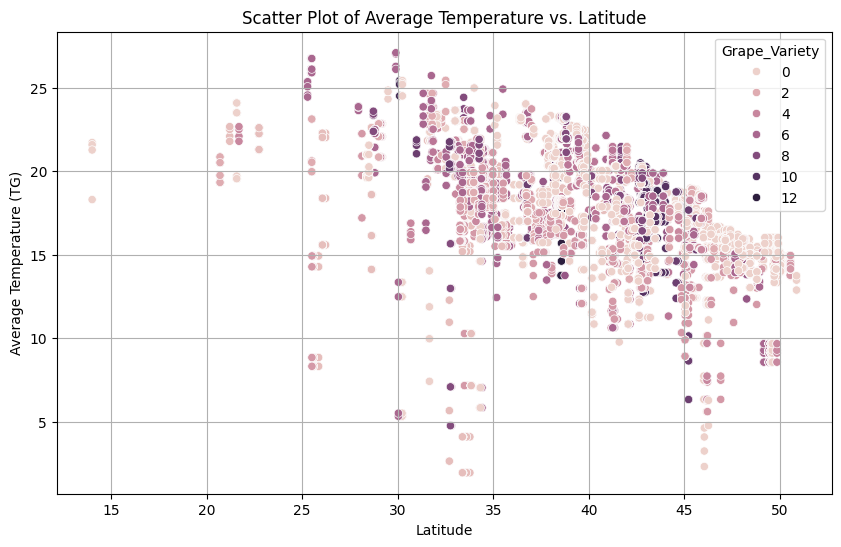

In [74]:
# prompt: draw scatter plot of TG with the x-axis of Latitude

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ab_Latitude', y='TG', data=df_climate, hue = 'Grape_Variety')
plt.xlabel('Latitude')
plt.ylabel('Average Temperature (TG)')
plt.title('Scatter Plot of Average Temperature vs. Latitude')
plt.grid(True)
plt.show()


<ipython-input-75-ef25c0489c3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate['Latitude_Group'] = pd.cut(df_climate['ab_Latitude'], bins=bins)


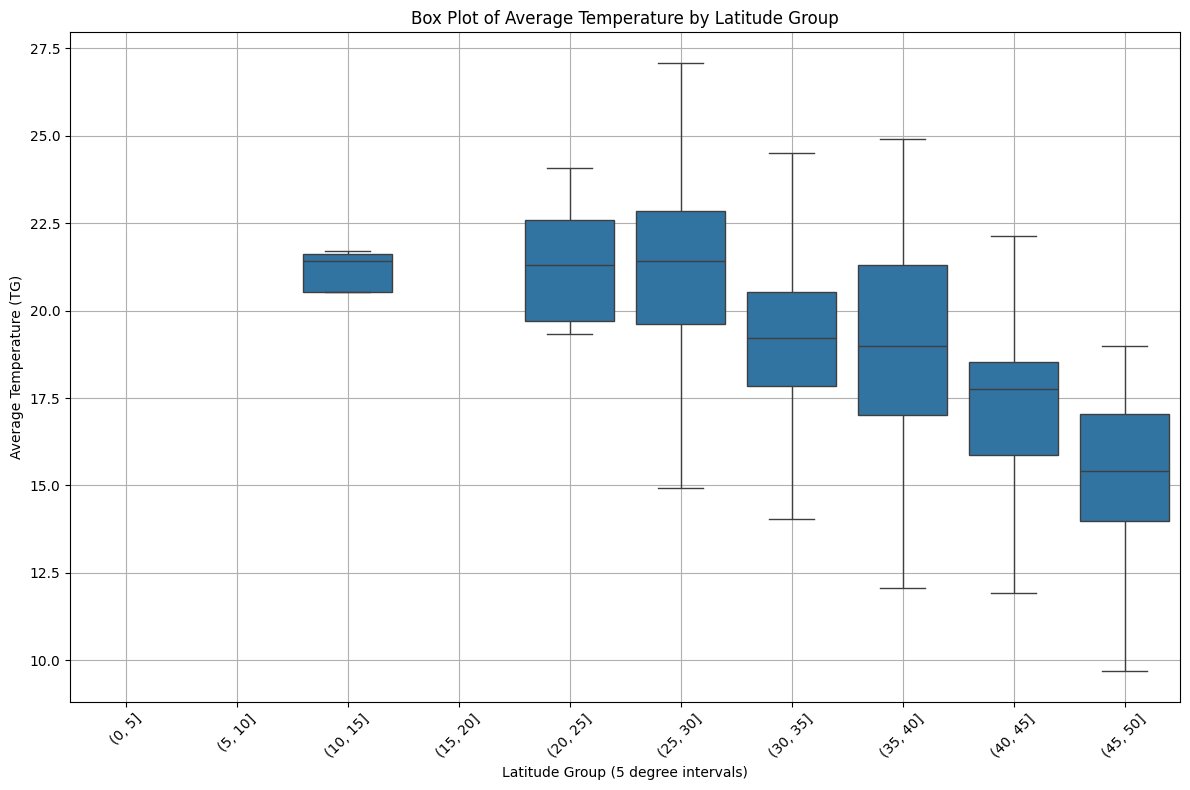

In [75]:
# prompt: Create a box plot of TG values by every 5 degree of ab_Latitude


# Create bins for latitude
bins = range(0, int(df_climate['ab_Latitude'].max()) + 5, 5)
df_climate['Latitude_Group'] = pd.cut(df_climate['ab_Latitude'], bins=bins)

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Latitude_Group', y='TG', data=df_climate, showfliers=False)  # showfliers=False to hide outliers
plt.xlabel('Latitude Group (5 degree intervals)')
plt.ylabel('Average Temperature (TG)')
plt.title('Box Plot of Average Temperature by Latitude Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
df_climate['Grape_Variety2'] = np.where(df_climate['Grape_Variety'] == 0, 0, 1)

<ipython-input-76-8be6ce11b5f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate['Grape_Variety2'] = np.where(df_climate['Grape_Variety'] == 0, 0, 1)


In [77]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13416 entries, 0 to 13821
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Latitude        13416 non-null  float64 
 1   Longitude       13416 non-null  float64 
 2   TG              13416 non-null  float64 
 3   TN              13416 non-null  float64 
 4   TX              13416 non-null  float64 
 5   RR              13416 non-null  float64 
 6   RR1             13416 non-null  float64 
 7   Grape_Variety   13416 non-null  float64 
 8   ab_Latitude     13416 non-null  float64 
 9   Latitude_Group  13244 non-null  category
 10  Grape_Variety2  13416 non-null  int64   
dtypes: category(1), float64(9), int64(1)
memory usage: 1.1 MB


In [79]:
corr_matrix = df_climate[['Grape_Variety2', 'TG', 'TN', 'TX', 'RR', 'RR1']].corr()
corr_matrix

,Grape_Variety2,TG,TN,TX,RR,RR1
Grape_Variety2,1.000000,0.020205,0.216320,0.019962,-0.046275,-0.117281
TG,0.020205,1.000000,0.700788,0.788044,-0.278491,-0.397973
TN,0.216320,0.700788,1.000000,0.370696,-0.342974,-0.561384
TX,0.019962,0.788044,0.370696,1.000000,-0.385992,-0.355140
RR,-0.046275,-0.278491,-0.342974,-0.385992,1.000000,0.831294
RR1,-0.117281,-0.397973,-0.561384,-0.355140,0.831294,1.000000


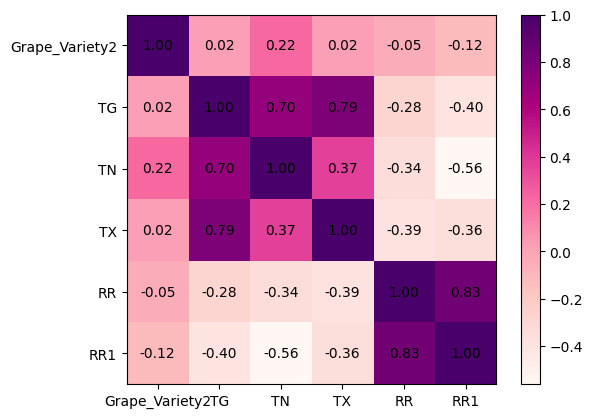

In [86]:
plt.imshow(corr_matrix, cmap='RdPu', interpolation='nearest')

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = "{:.2f}".format(corr_matrix.iloc[i, j])
        plt.annotate(text, xy=(j, i), ha='center', va='center')

plt.colorbar()

- 상관관계를 살펴보면 기온에서는 TG, TX보다 TN(평균 최저 온도)에서 0.22의 상관계수를 가짐
- TN > RR1 > RR > TX = TG 순서로 나타남
- 기온 데이터 또한 강수량과 |0.28| 이상의 상관 계수를 가짐
- Grape_Variety2: 주요 품종 생산 여부 (Top12: 1, others:0)


In [ ]:
# TN & RR1 관계 그래프

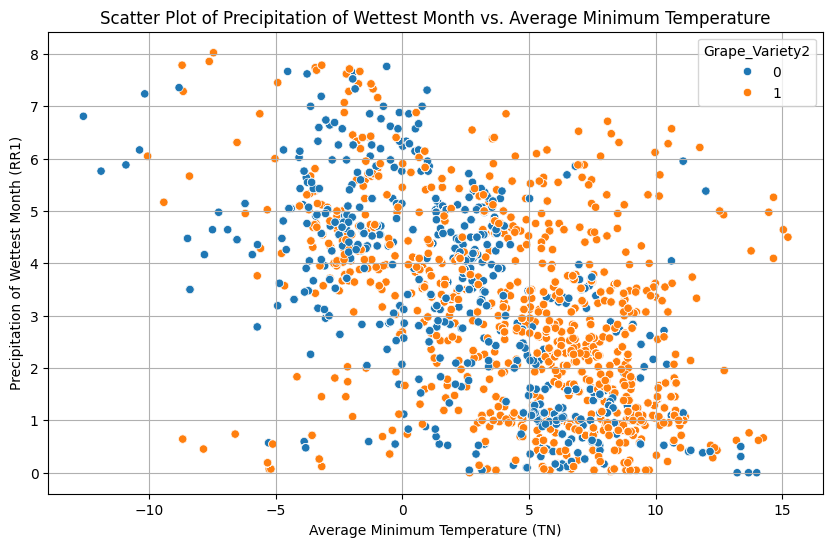

In [89]:
# prompt: draw a graph that shows relationship between TN and RR1

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TN', y='RR1', data=df_climate, hue='Grape_Variety2')
plt.xlabel('Average Minimum Temperature (TN)')
plt.ylabel('Precipitation of Wettest Month (RR1)')
plt.title('Scatter Plot of Precipitation of Wettest Month vs. Average Minimum Temperature')
plt.grid(True)
plt.show()


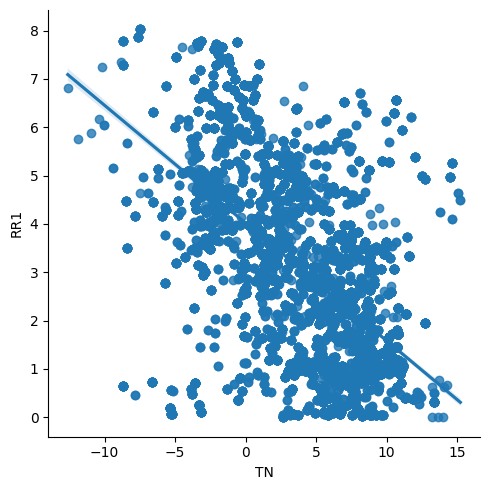

In [92]:
sns.lmplot(x = 'TN', y = 'RR1', data = df_climate)

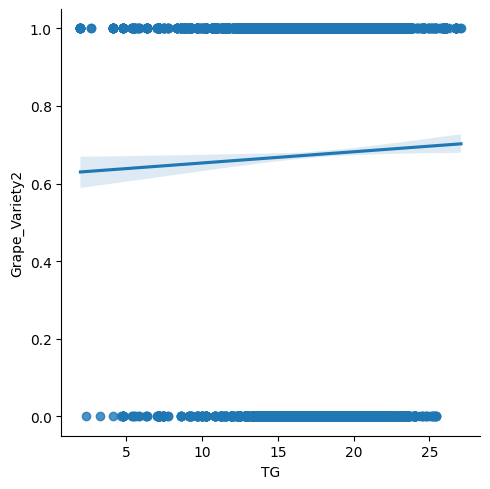

In [93]:
sns.lmplot(x = 'TG', y = 'Grape_Variety2', data = df_climate)

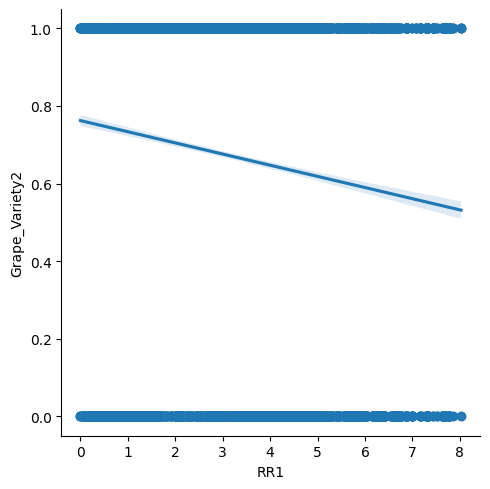

In [94]:
sns.lmplot(x = 'RR1', y = 'Grape_Variety2', data = df_climate)